In [304]:
import h5py as h5
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import seaborn as sns
import legwork

import sys
sys.path.append("../src/")
from variations import variations
from galaxy import simulate_mw

%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif')
fs = 20

params = {'legend.fontsize': fs,
         'axes.labelsize': fs,
         'xtick.labelsize':0.7*fs,
         'ytick.labelsize':0.7*fs}
plt.rcParams.update(params)

In [305]:
dco_colours = {"BHBH": plt.get_cmap("plasma")(0.2), 
               "BHNS": plt.get_cmap("plasma")(0.5),
               "NSNS": plt.get_cmap("plasma")(0.8)}

dco_types = ["BHBH", "BHNS", "NSNS"]
sim_folder = "../data/simulation_plus_supp/"

total_DCOs_in_MW = np.load("../data/total_DCO_in_MW.npy")
total_bound_DCOs_in_MW = np.load("../data/total_DCO_in_MW_nohubble.npy")

detections = np.load("../data/detections_4yr.npy")
detections_10yr = np.load("../data/detections_10yr.npy")

In [237]:
channels = [
    {
        "label": "other",
        "colour": "#808080"
    },
    {
        "label": "classic",
        "colour": "#118ab2"
    },
    {
        "label": "only stable",
        "colour": "#ef476f"
    },
    {
        "label": "single core CEE",
        "colour": "#ffd166"
    },
    {
        "label": "double core CEE",
        "colour": "#073b4c"
    },
]

MT_case_translate = np.array(["X", "A", "B", "C"])

In [3]:
def kdeplot_by_channel(variable, dco_type_list=["BHBH", "BHNS", "NSNS"], channels=[0, 1, 2, 3, 4], variation_index=0, show=True, fig=None, ax=None, **kwargs):
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, figsize=(10, 5))

    for dco_type in dco_type_list:
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[variation_index]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = np.logical_and(full_data["snr"] > 7, np.isin(full_data["channel"], channels))

            data = full_data[mask]
            print(len(data))

        sns.kdeplot(data[variable], weights=data["weight"], color=dco_colours[dco_type], cut=0, **kwargs, ax=ax)

    if show:
        print("yo")
        plt.show()
    return fig, ax

In [6]:
with h5.File(sim_folder + "{}_{}_all.h5".format("BHNS", "fiducial"), "r") as f:
    full_data = f["simulation"][...].squeeze()
    mask = full_data["snr"] > 7

    data = full_data[mask]
#     _, places = np.unique(data["seed"], return_index=True)
#     data = data[places]
    
mBH = np.maximum(data["m_1"], data["m_2"])
mNS = np.minimum(data["m_1"], data["m_2"])

t_merge = legwork.evol.get_t_merge_ecc(ecc_i=data["e_DCO"], a_i=data["a_DCO"] * u.AU,
                                          m_1=data["m_1"] * u.Msun, m_2=data["m_2"] * u.Msun).to(u.Gyr)

0 71
1 20078
2 2441
3 129
4 17


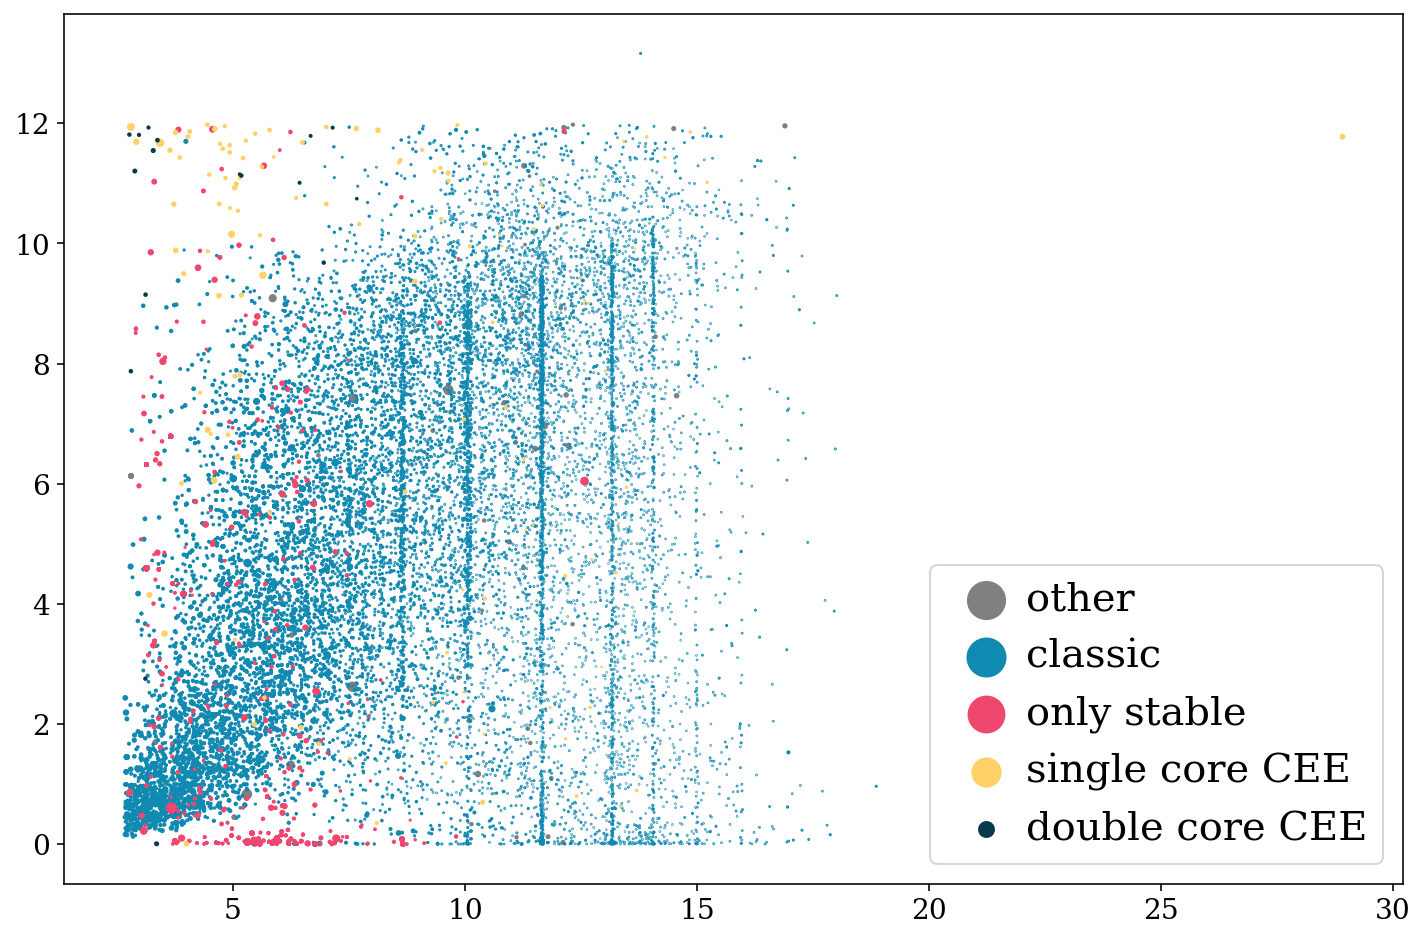

In [16]:
fig, ax = plt.subplots()
for i in range(len(channels)):

    ch_mask = data["channel"] == i
    print(i, len(mBH[ch_mask] / len(mBH)))
        
    ax.scatter(mBH[ch_mask], t_merge.value[ch_mask], s=25 * data["weight"][ch_mask],
               color=channels[i]["colour"], label=channels[i]["label"])
    
# ax.set_xscale("log")
# ax.set_yscale("log")

ax.legend(markerscale=6, handletextpad=0)

plt.show()

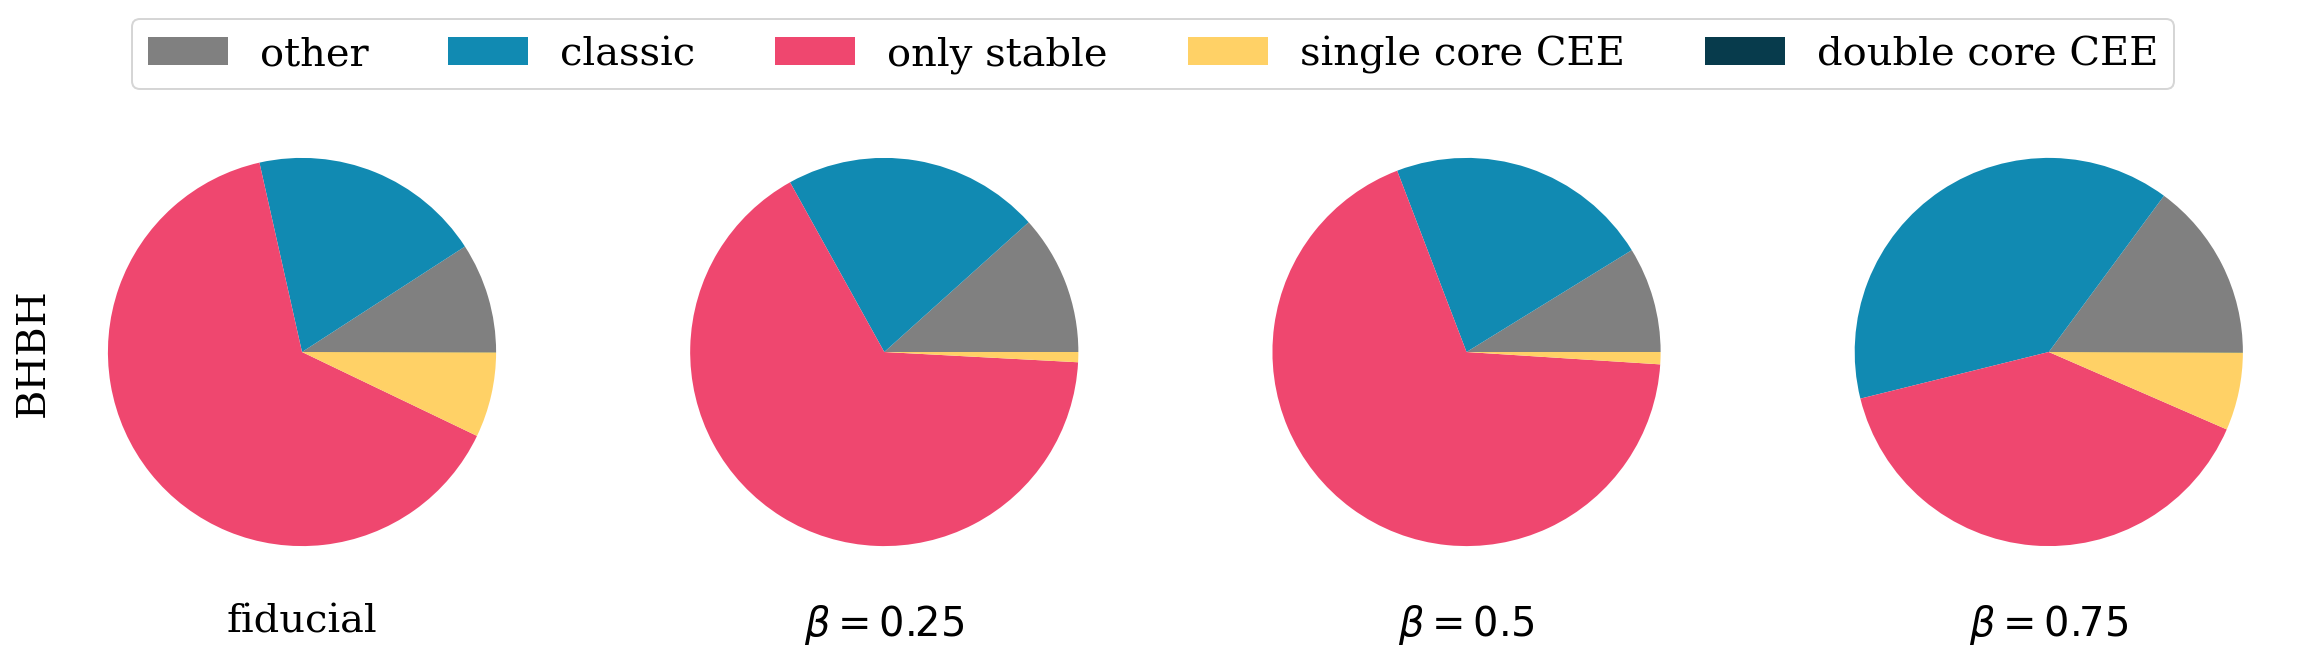

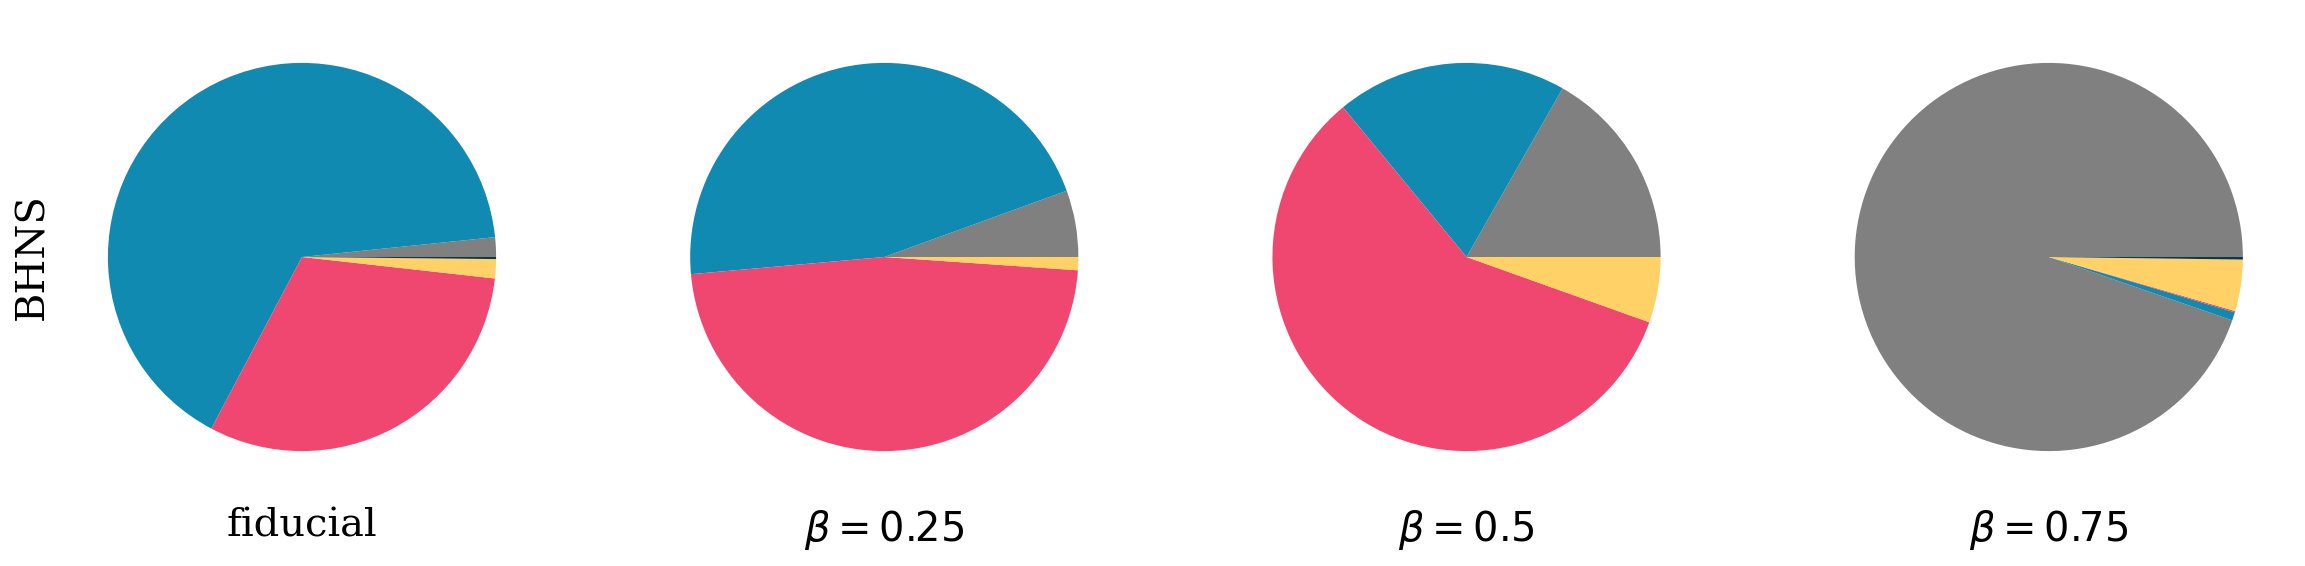

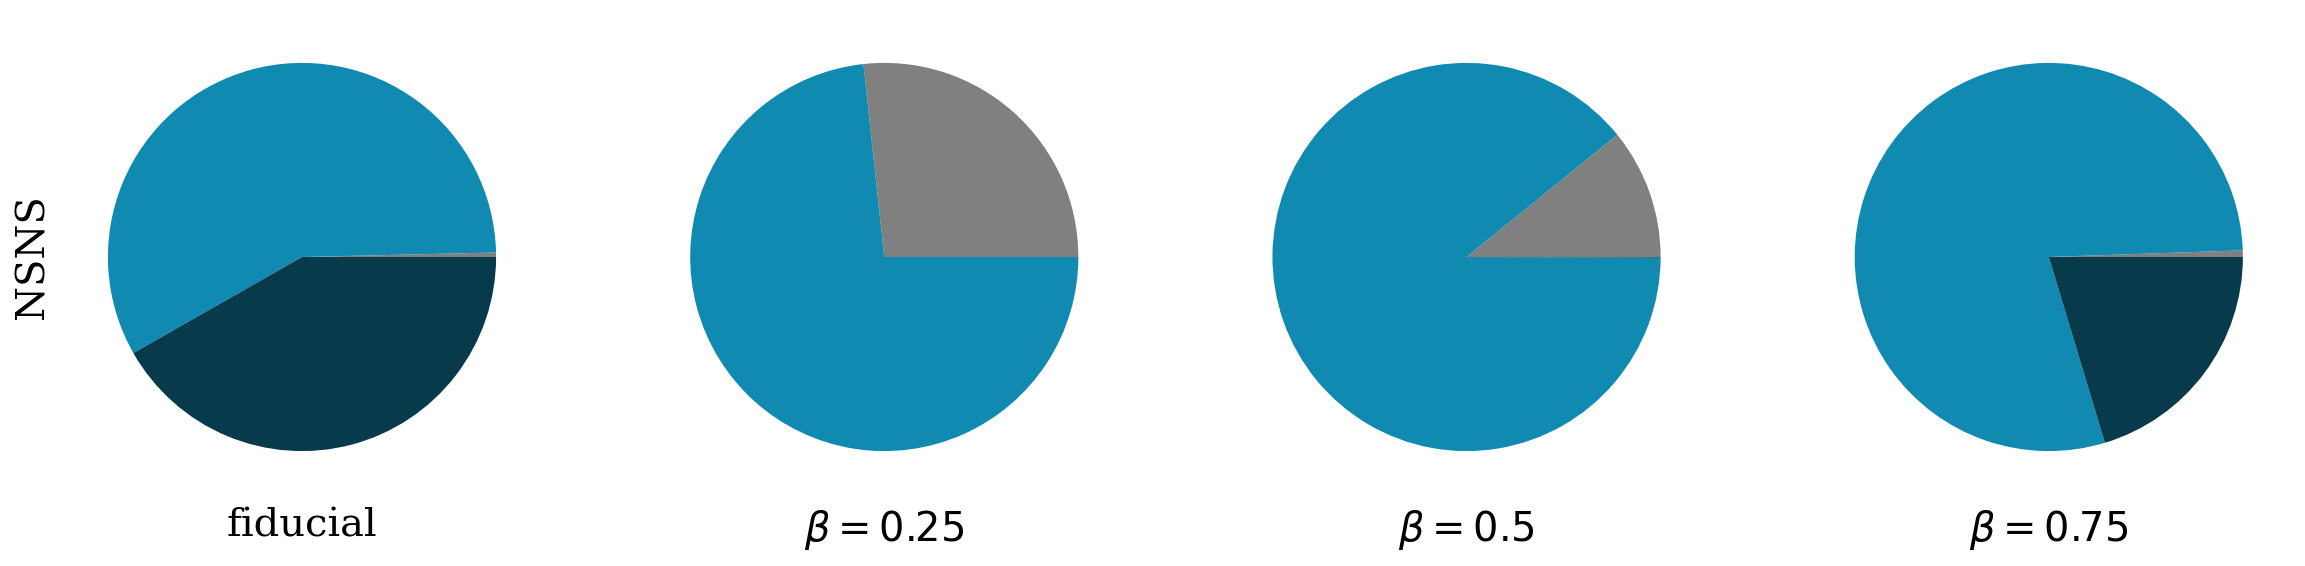

In [42]:
for dco_type in dco_types:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for v in range(4):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = [np.sum(data["weight"][data["channel"] == i]) for i in range(len(channel_colours))]
        axes[v].pie(fractions, colors=[channels[c]["colour"] for c in range(len(channels))],
                    labels=[channels[c]["label"] for c in range(len(channels))], labeldistance=None)
        axes[v].set_xlabel(variations[v]["med"])

    axes[0].set_ylabel(dco_type)
    
    if dco_type == "BHBH":
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', fontsize=fs, ncol=5)
    
plt.show()

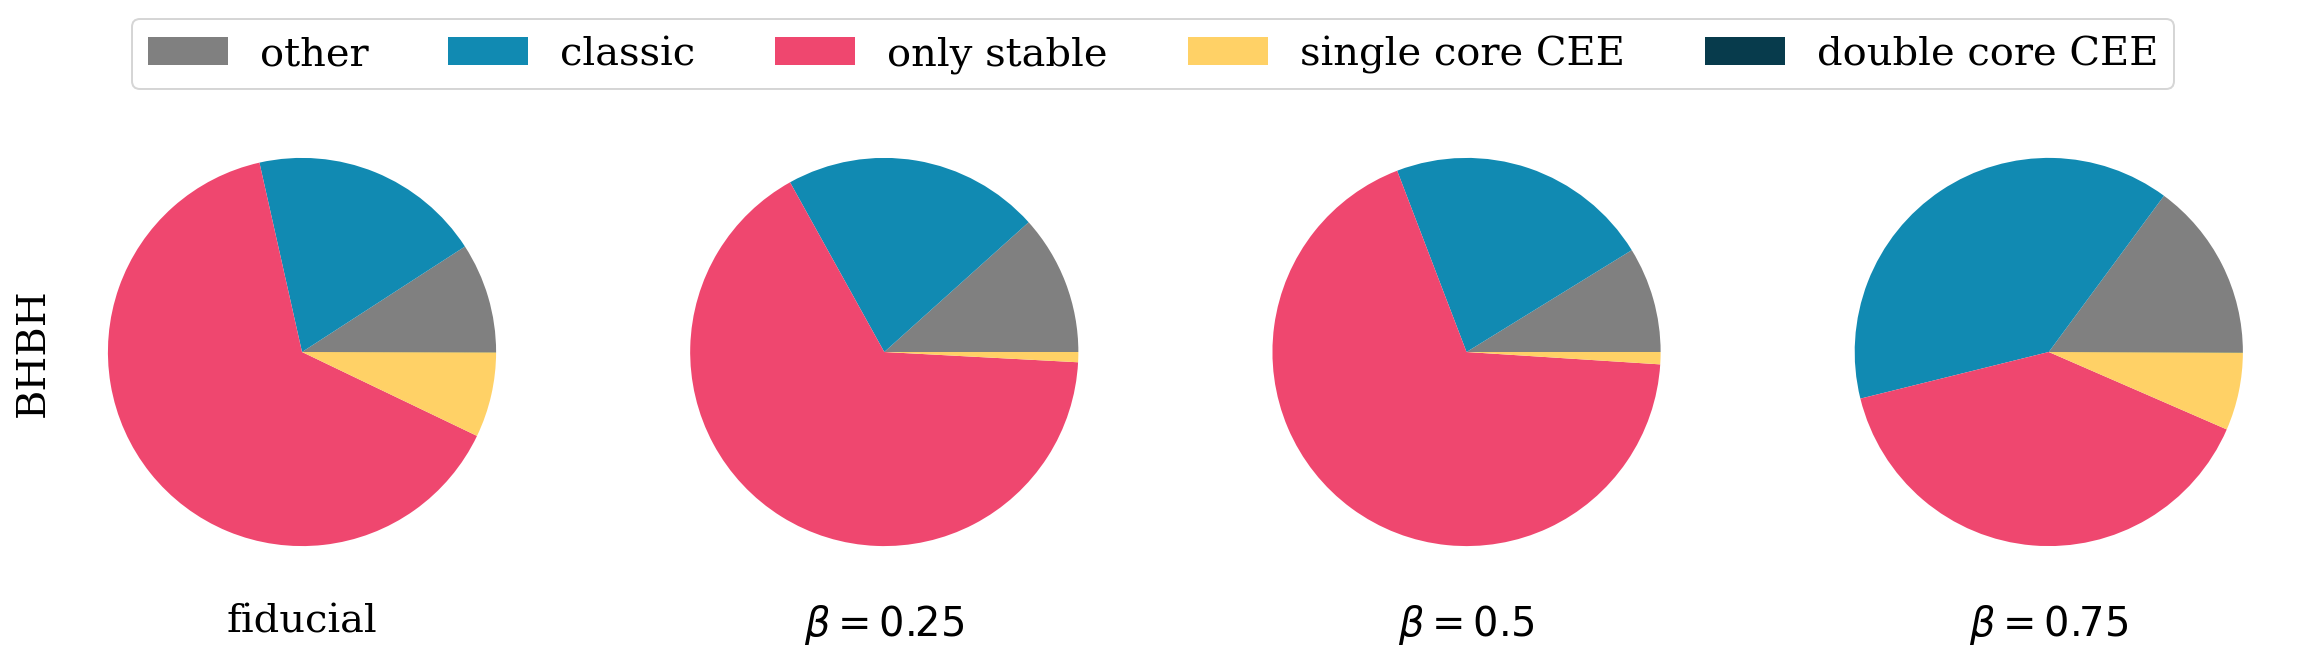

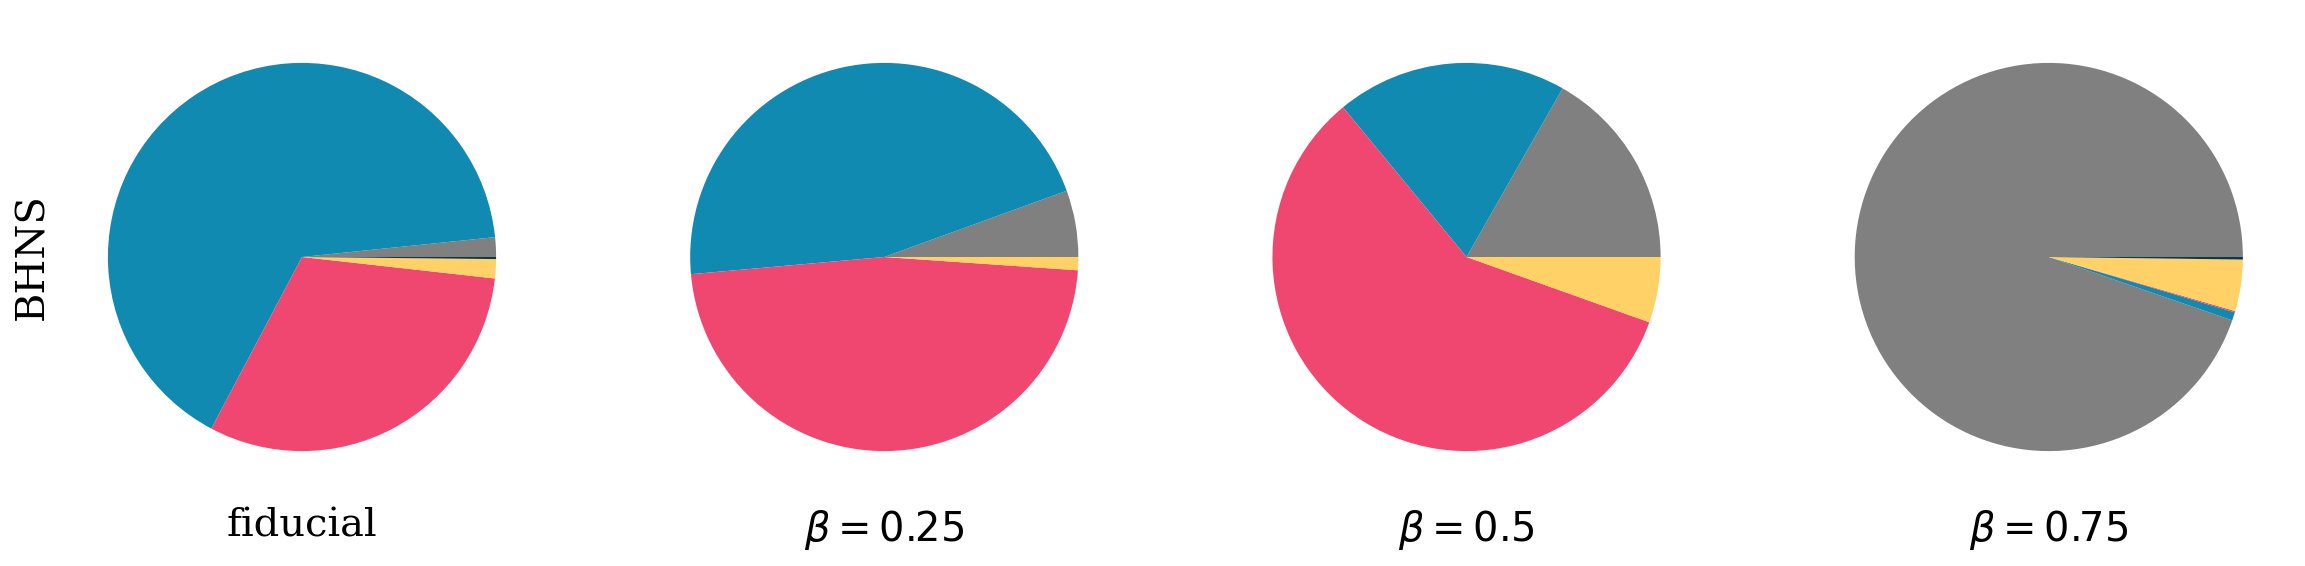

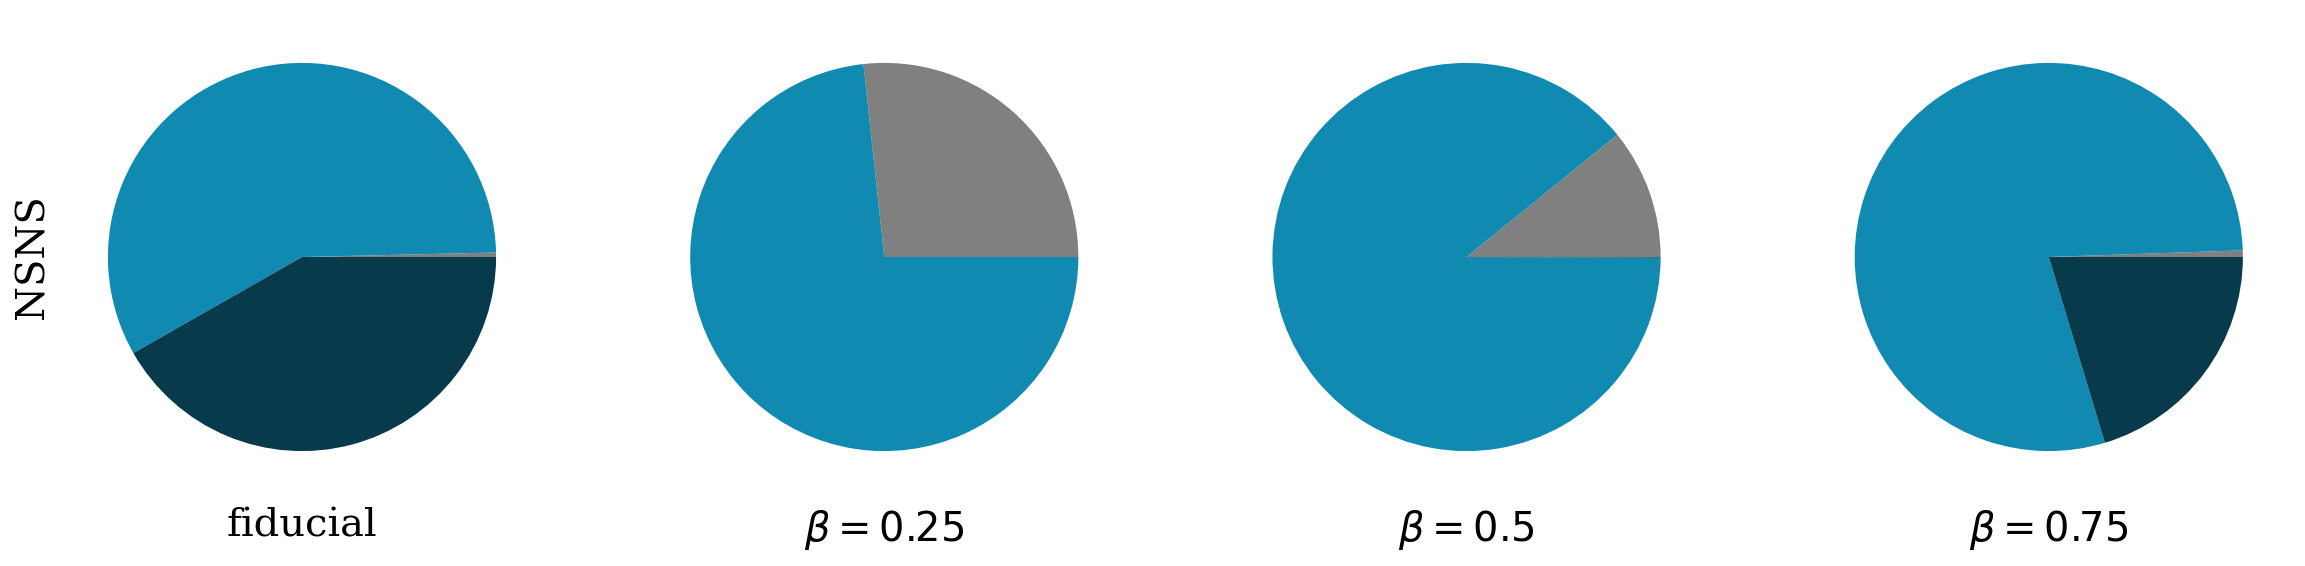

In [45]:
for dco_type in dco_types:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for v in range(4):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = [np.sum(data["weight"][data["channel"] == i]) for i in range(len(channel_colours))]
        axes[v].pie(fractions, colors=[channels[c]["colour"] for c in range(len(channels))],
                    labels=[channels[c]["label"] for c in range(len(channels))], labeldistance=None)
        axes[v].set_xlabel(variations[v]["med"])

    axes[0].set_ylabel(dco_type)
    
    if dco_type == "BHBH":
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', fontsize=fs, ncol=5)
    
plt.show()

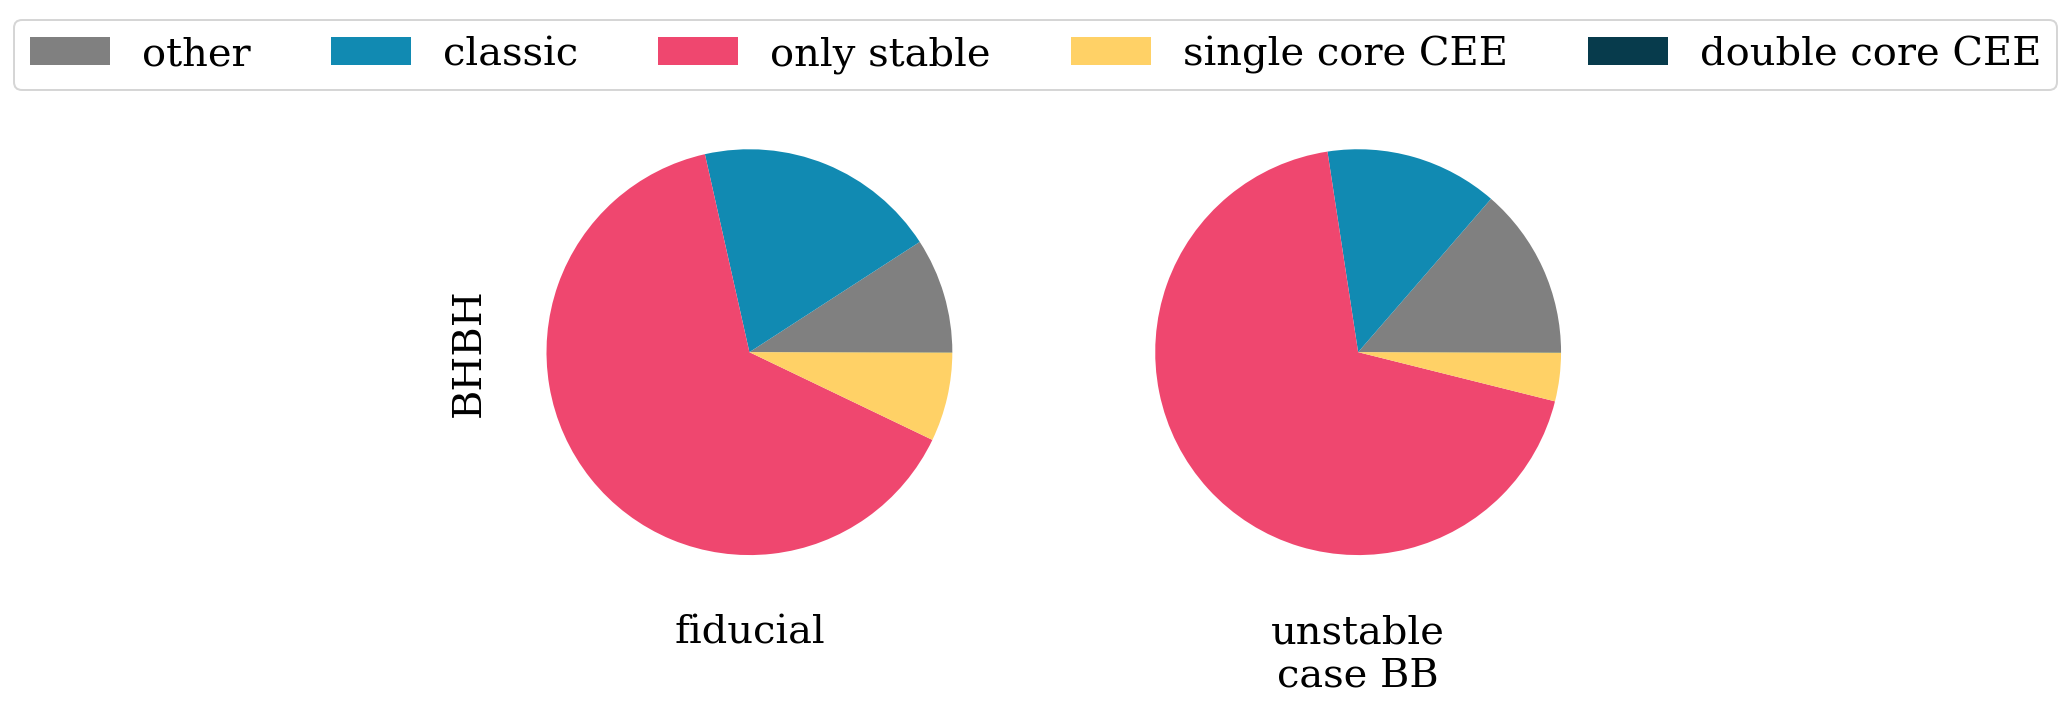

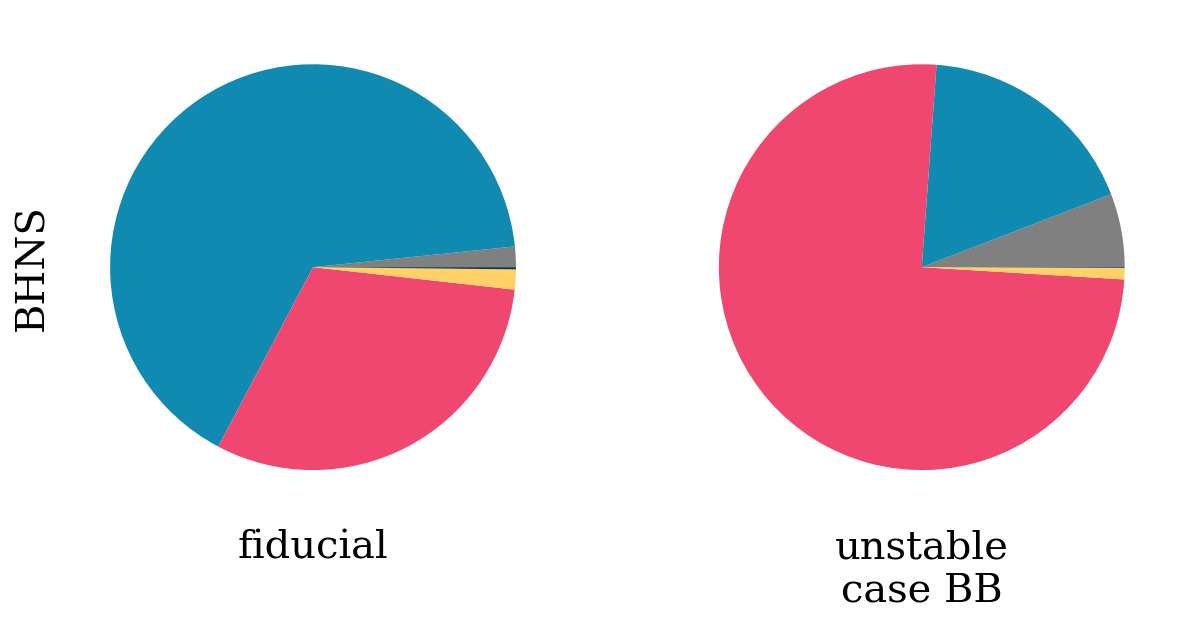

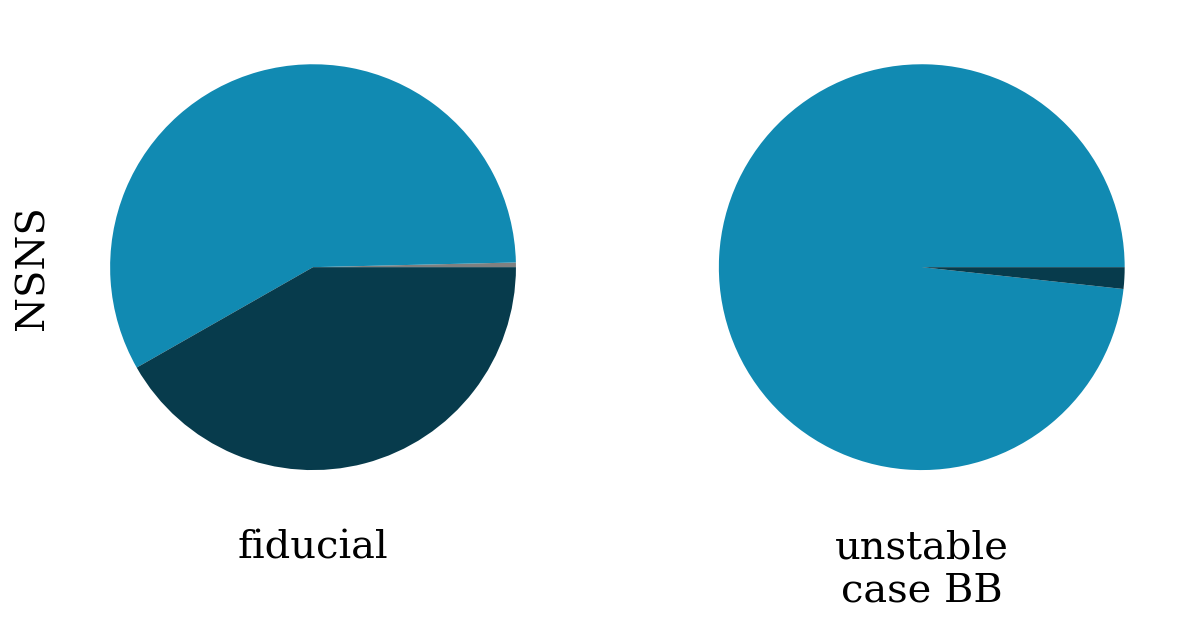

In [338]:
variation_list = [0, 4]
for dco_type in dco_types:
    fig, axes = plt.subplots(1, len(variation_list), figsize=(5 * len(variation_list), 5))
    for v in range(len(variation_list)):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[variation_list[v]]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = [np.sum(data["weight"][data["channel"] == i]) for i in range(len(channel_colours))]
        axes[v].pie(fractions, colors=[channels[c]["colour"] for c in range(len(channels))],
                    labels=[channels[c]["label"] for c in range(len(channels))], labeldistance=None)
        axes[v].set_xlabel(variations[variation_list[v]]["med"])

    axes[0].set_ylabel(dco_type)
    
    if dco_type == "BHBH":
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', fontsize=fs, ncol=5)
    
plt.show()

In [89]:
for dco_type in dco_types:
    print(dco_type)
    print("====")
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        mask = full_data["snr"] > 7

        data = full_data[mask]

    for i in range(len(channels)):
        c_data = data[data["channel"] == i]
        caseC = np.logical_or(MT_case_translate[c_data["MT1_case"]] == "C",
                                MT_case_translate[c_data["MT2_case"]] == "C")
        percCaseC = len(c_data[caseC]) / len(c_data) * 100 if len(c_data) > 0 else "-"
        caseBB = np.logical_and(MT_case_translate[c_data["MT1_case"]] == "B",
                                MT_case_translate[c_data["MT2_case"]] == "B")
        percCaseBB = len(c_data[caseBB]) / len(c_data) * 100 if len(c_data) > 0 else "-"
        
        print(channels[i]["label"])
        print("\t{:1.2}% case BB, {:1.2}% any case C".format(percCaseBB, percCaseC))
    print()
plt.show()

BHBH
====
other
	0.87% case BB, 9.8e+01% any case C
classic
	0.0% case BB, 1e+02% any case C
only stable
	1e+02% case BB, 0.0% any case C
single core CEE
	0.0% case BB, 1e+02% any case C
double core CEE
	0.0% case BB, 1e+02% any case C

BHNS
====
other
	0.0% case BB, 1e+02% any case C
classic
	0.0% case BB, 1e+02% any case C
only stable
	1e+02% case BB, 0.0% any case C
single core CEE
	0.0% case BB, 1e+02% any case C
double core CEE
	0.0% case BB, 1e+02% any case C

NSNS
====
other
	0.0% case BB, 1e+02% any case C
classic
	0.0% case BB, 1e+02% any case C
only stable
	-% case BB, -% any case C
single core CEE
	-% case BB, -% any case C
double core CEE
	0.0% case BB, 1e+02% any case C



0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.08980952420815169
1 0 0.0
1 1 0.0
1 2 0.0008365737133020278
1 3 0.0
2 0 0.0
2 1 0.0
2 2 0.6444250602277616
2 3 0.1934182387298368
3 0 0.00023024482295598808
3 1 0.0
3 2 0.06998370629426776
3 3 0.0012966520037241797
0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.01460717532975161
1 0 0.0
1 1 0.0
1 2 0.0
1 3 0.0005561333456866885
2 0 0.0
2 1 0.0
2 2 0.30969887678759944
2 3 0.6566526208971325
3 0 0.0017330651734136786
3 1 0.0002484602740204771
3 2 0.012010432277363143
3 3 0.00449323591503236
0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.0003208263488951862
1 0 0.0
1 1 0.0
1 2 0.0
1 3 0.0
2 0 0.0
2 1 0.0
2 2 0.0
2 3 0.5815399712525063
3 0 0.03333399004118782
3 1 0.0
3 2 0.38480521235741083
3 3 0.0


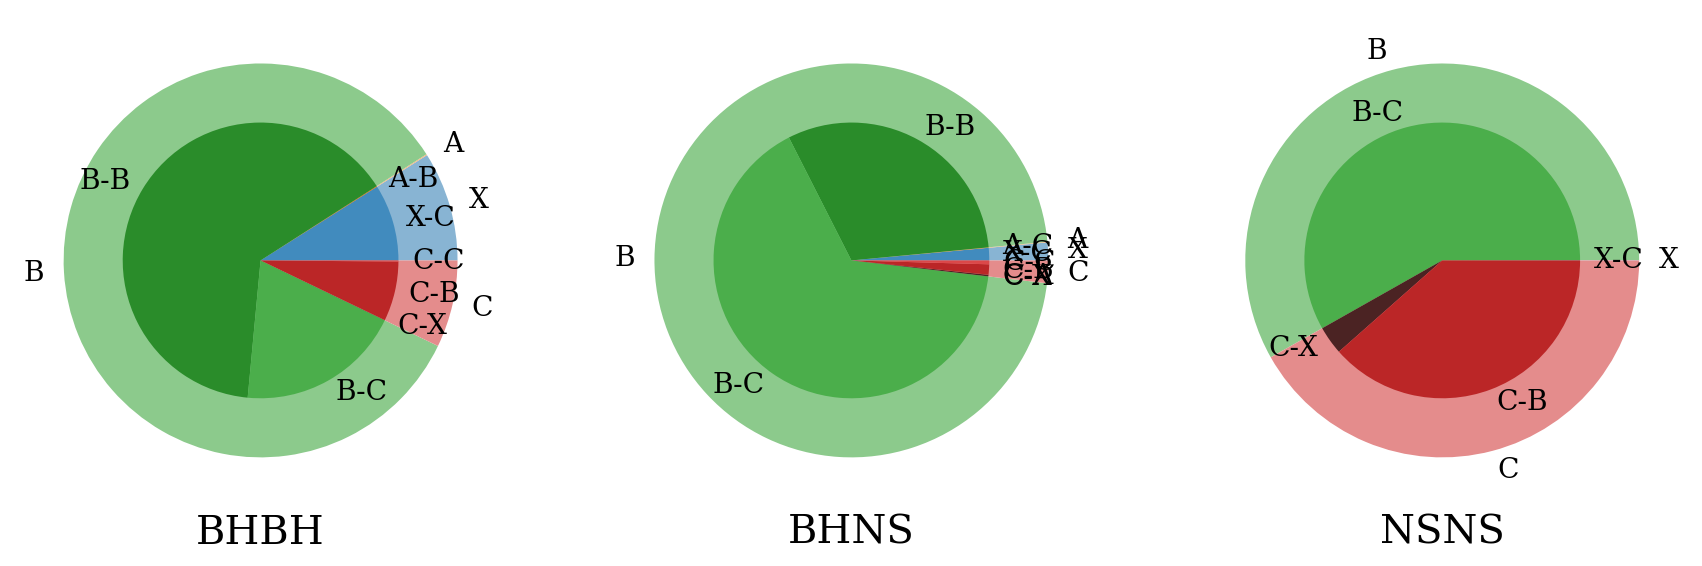

In [255]:
case_list = np.array([0, 1, 2, 3])
case_labels = np.array(["{}-{}".format(a, b) for a in MT_case_translate[case_list] for b in MT_case_translate[case_list]])

model = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 30))
for dco_type in dco_types:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[model]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        mask = full_data["snr"] > 7

        data = full_data[mask]
        
    fractions = np.zeros((4, 4))
        
    for case in case_list:
        for case2 in case_list:
            matches = np.logical_and(data["MT1_case"] == case,
                                      data["MT2_case"] == case2)
            fractions[case, case2] = np.sum(data["weight"][matches]) / np.sum(data["weight"])
            print(case, case2, fractions[case, case2])
    
    # plot the outer pie plot
    
    outer = fractions.sum(axis=1)
    outer_mask = outer > 0.00
    axes[dco_types.index(dco_type)].pie(outer[outer_mask], labels=MT_case_translate[case_list][outer_mask],
           colors=case_colours[:, -1][outer_mask], normalize=False)
    
    inner = fractions.flatten()
    inner_mask = inner > 0.00
    
    axes[dco_types.index(dco_type)].pie(inner[inner_mask], radius=0.7,
           labels=case_labels[inner_mask],
           colors=case_colours[:, :4, :].reshape(16, 3)[inner_mask],
           normalize=False)
    
    axes[dco_types.index(dco_type)].set_xlabel(dco_type)

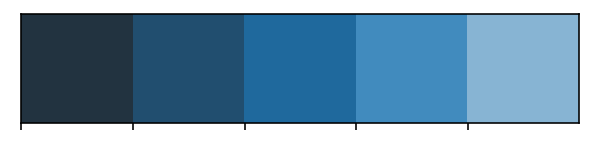

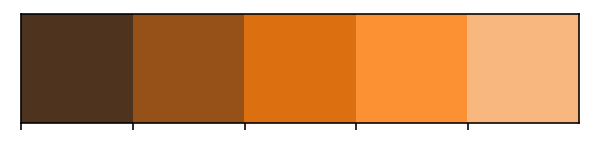

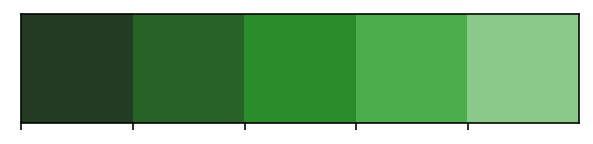

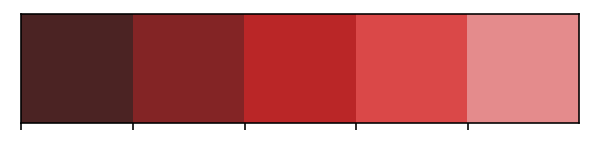

In [215]:
case_colours = np.empty(shape=(4, 5, 3), dtype="object")

maps = sns.color_palette("tab10", 4)
for i, m in enumerate(maps):
    darks = sns.dark_palette(m, 7)
    lights = sns.light_palette(m, 7, reverse=True)[1:]
    case_colours[i, :] = np.array(darks + lights)[1:-2:2]
    sns.palplot(case_colours[i, :])

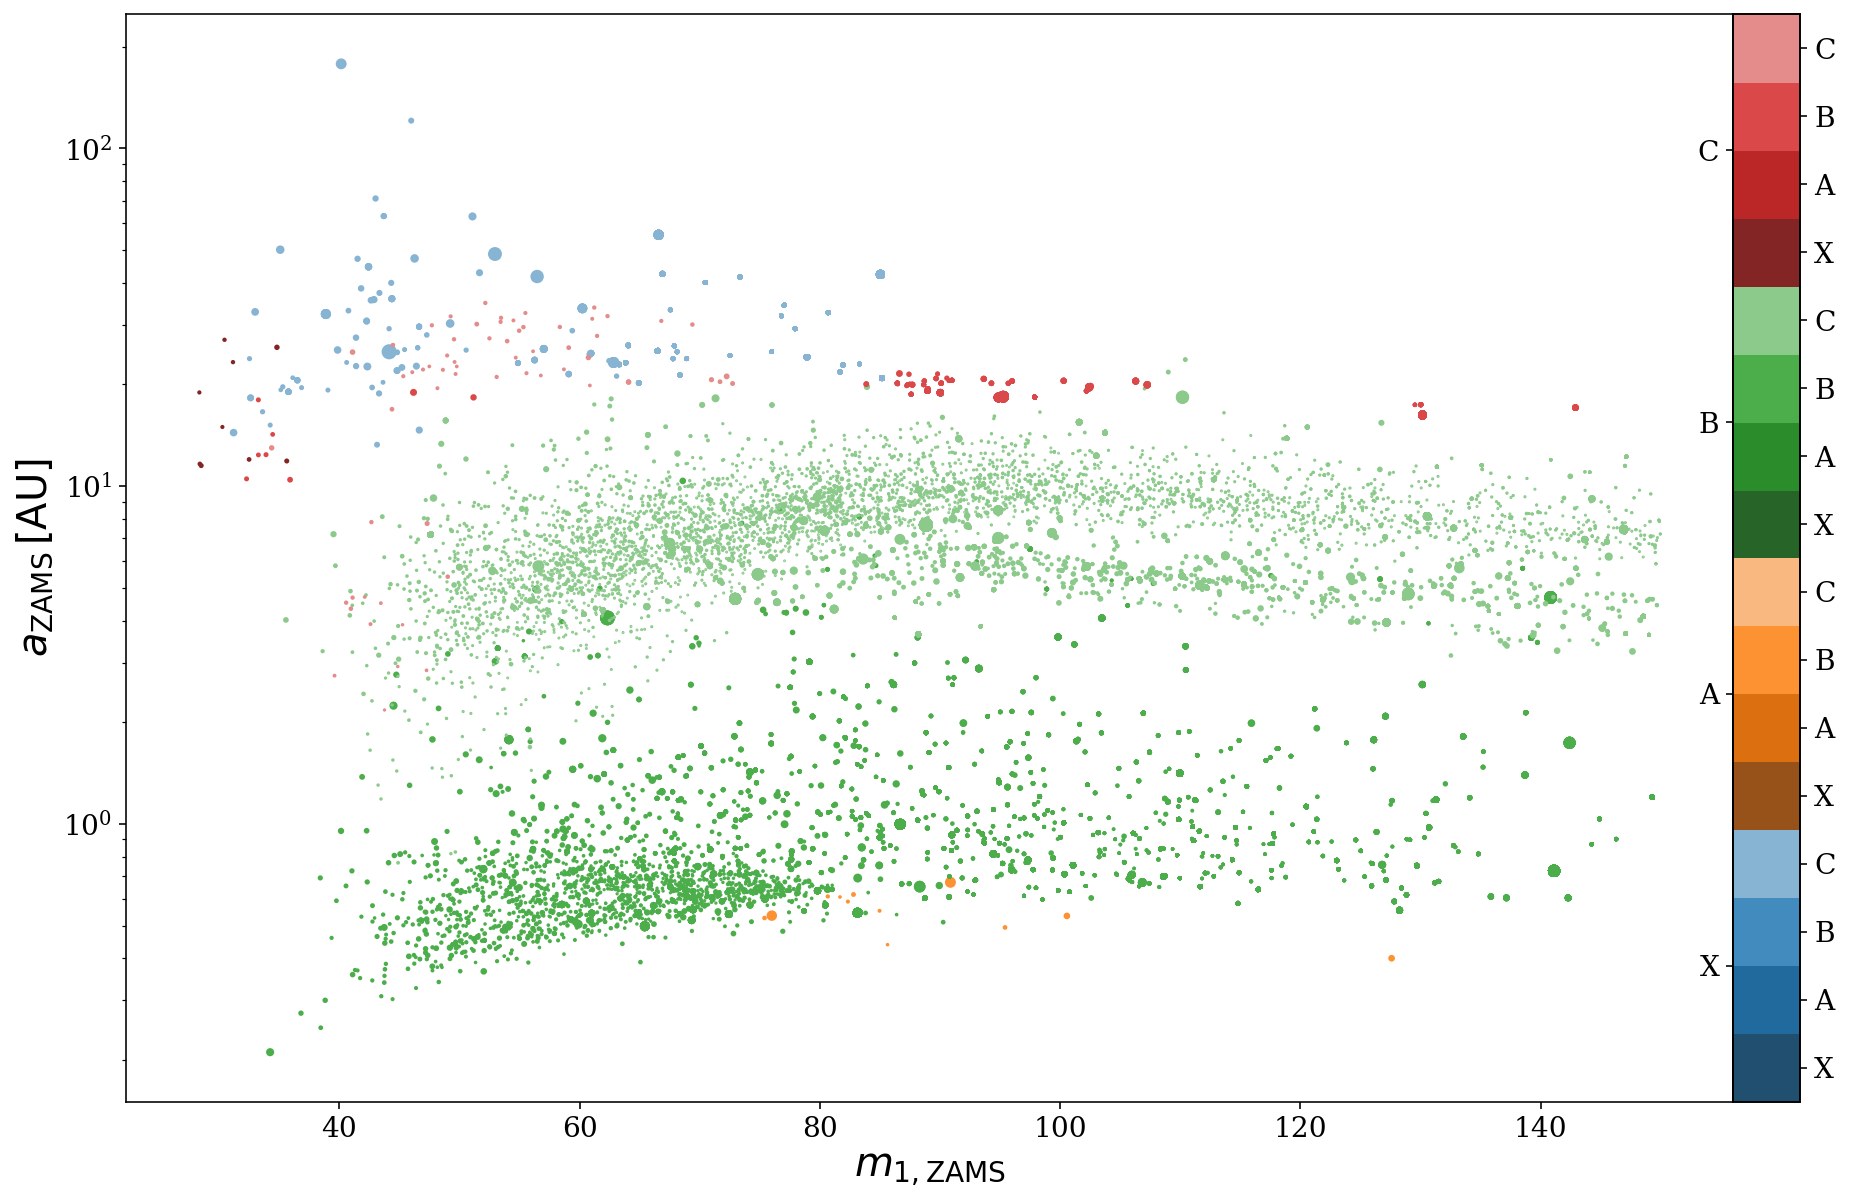

In [303]:
fig, ax = plt.subplots(figsize=(15, 10))

model = 0

with h5.File(sim_folder + "{}_{}_all.h5".format("BHBH", variations[model]["file"]), "r") as f:
    full_data = f["simulation"][...].squeeze()
    snr_mask = full_data["snr"] > 7

    data = full_data[snr_mask]

m1 = np.maximum(data["m_1_ZAMS"], data["m_2_ZAMS"])
m2 = np.minimum(data["m_1_ZAMS"], data["m_2_ZAMS"])
q = m2 / m1

for case in case_list:
    for case2 in case_list:
        mask = np.logical_and(data["MT1_case"] == case,
                              data["MT2_case"] == case2)

        ax.scatter(m1[mask], data["a_ZAMS"][mask], s=data["weight"][mask] * 50, color=case_colours[case, case2 + 1])#, label=case_labels[(case * 4) + case2])

cmap = matplotlib.colors.ListedColormap(case_colours[:, 1:, :].reshape(16, 3))
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap), fraction=0.04, pad=0.0)
cbar.set_ticks([1/8, 3/8, 5/8, 7/8])
cbar.set_ticklabels(["X", "A", "B", "C"])
cbar.ax.set_aspect("auto")

ax2 = cbar.ax.twinx()
ax2.set_yticks([x / 32 for x in range(1, 32, 2)])
ax2.set_yticklabels(["X", "A", "B", "C"] * 4)

ax.set_yscale("log")

ax.set_xlabel(r"$m_{1, \rm ZAMS}$")
ax.set_ylabel(r"$a_{\rm ZAMS}\, [\rm AU]$")

plt.savefig("../../paper/figures/BHBH_q_a_ZAMS_cases.png", dpi=400)

plt.show()

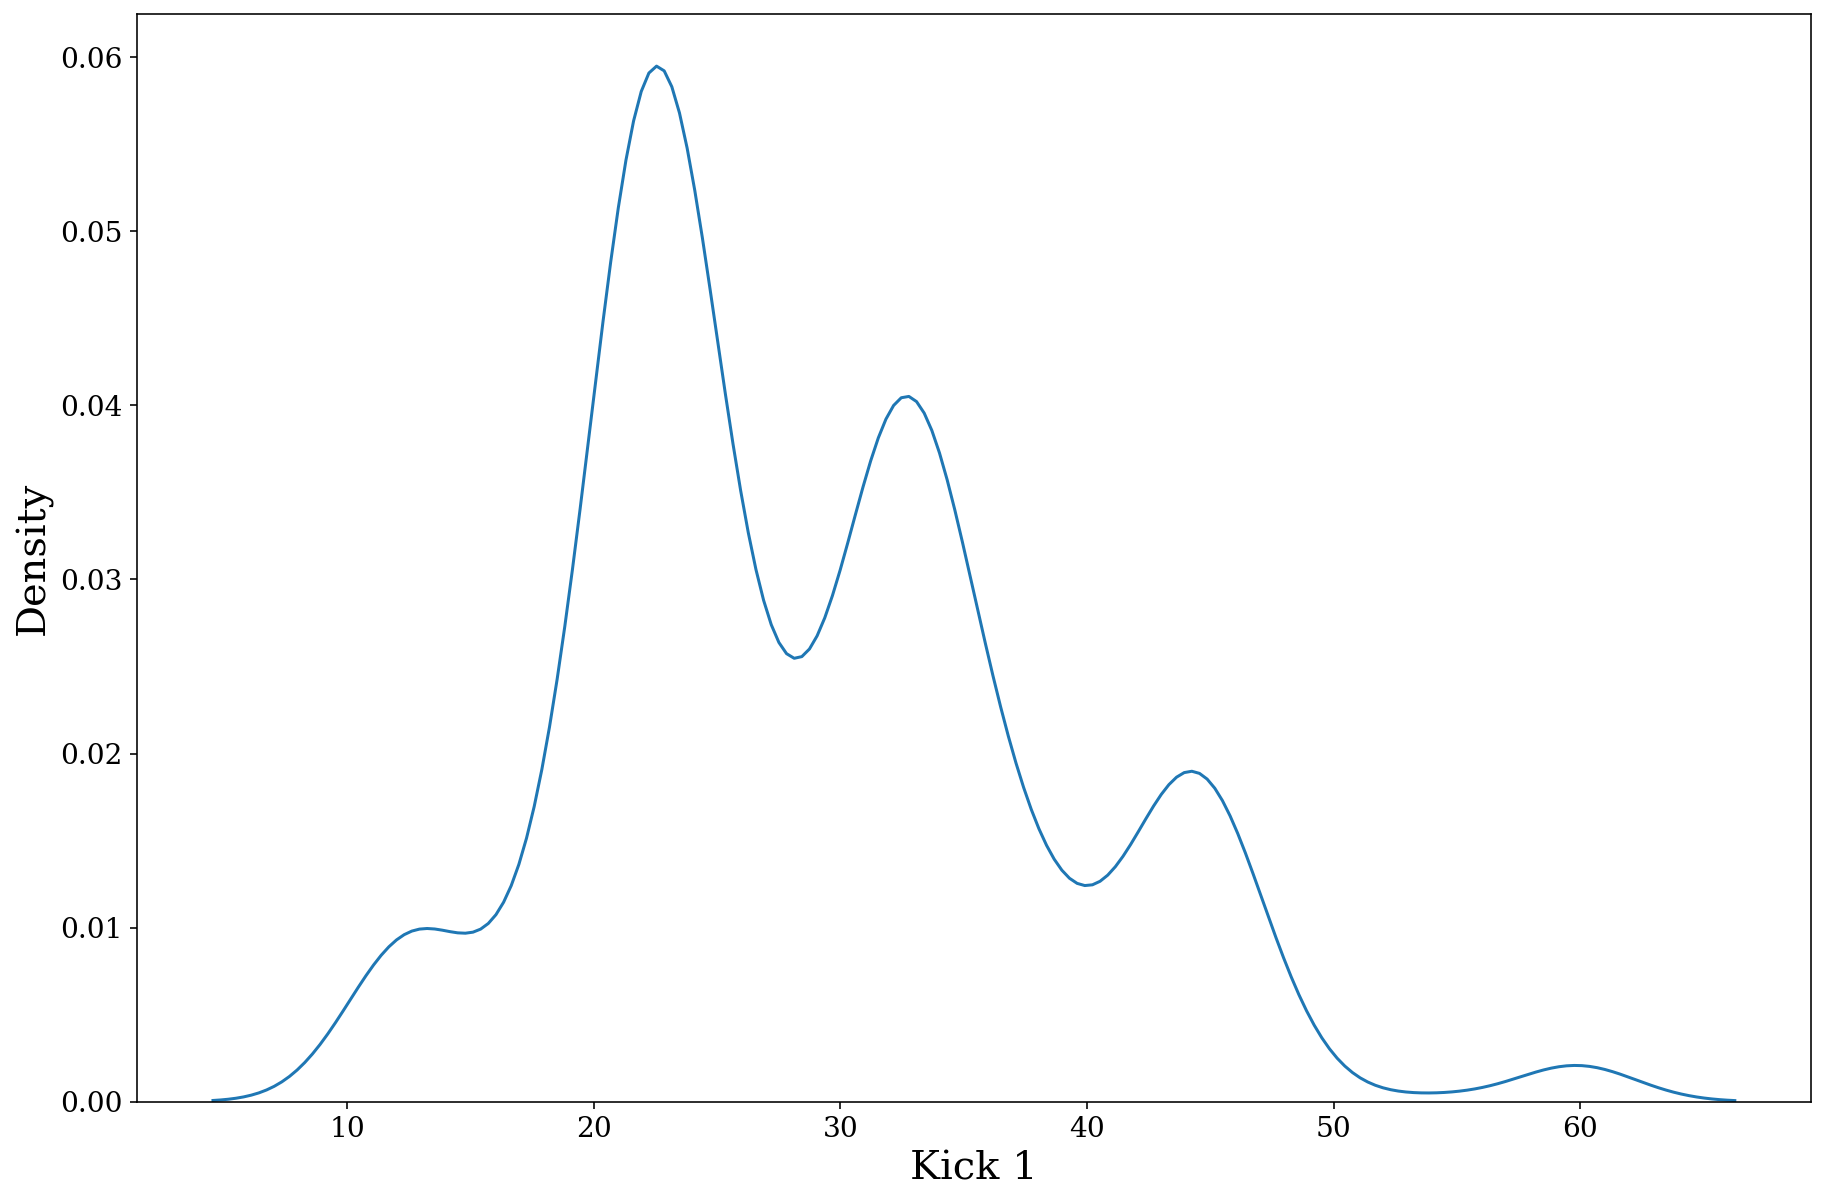

In [337]:
fig, ax = plt.subplots(figsize=(15, 10))

model = 0

with h5.File(sim_folder + "{}_{}_all.h5".format("BHBH", variations[model]["file"]), "r") as f:
    full_data = f["simulation"][...].squeeze()
    snr_mask = full_data["snr"] > 7

    data = full_data[snr_mask]

m1 = np.maximum(data["m_1_ZAMS"], data["m_2_ZAMS"])
m2 = np.minimum(data["m_1_ZAMS"], data["m_2_ZAMS"])
q = m2 / m1

mask= np.logical_and(data["MT1_case"] == 0,
                              data["MT2_case"] == 3)

sns.kdeplot(data["kick_1"][mask], weights=data["weight"][mask], ax=ax)#color=variations[model]["colour"], label="all")
# cbar = fig.colorbar(scatter)
# cbar.ax.set_ylabel(r"$\log_{10}(\mathrm{kick_1} / \rm{km \, s^{-1}})$")

# ax.set_yscale("log")

ax.set_xlabel(r"Kick 1")
# ax.set_ylabel(r"$a_{\rm ZAMS}\, [\rm AU]$")

# plt.savefig("../../paper/figures/BHBH_q_a_ZAMS_cases.png", dpi=400)

plt.show()

In [331]:
sources = legwork.source.Source(m_1=10*u.Msun, m_2=10*u.Msun, a=0.01 * u.AU, ecc=0.3, dist=10 * u.kpc)

In [334]:
sources.max_strain_harmonic(0.5)

4

In [266]:
import matplotlib